In [35]:
# General
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools as it

# CV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score,train_test_split,RandomizedSearchCV,cross_val_predict
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV, ParameterGrid
import time as time

# Models
from sklearn.linear_model import LogisticRegression
from patsy import dmatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier

In [2]:
data = pd.read_csv('data_dropped.csv')
data.head()

,kw_min_min,kw_max_avg,kw_avg_min,kw_avg_max,kw_avg_avg,kw_max_min,self_reference_min_shares,num_imgs,lda_01,lda_04,...,kw_max_max,title_subjectivity,abs_title_subjectivity,data_channel_is_socmed,max_negative_polarity,abs_title_sentiment_polarity,rate_positive_words,min_negative_polarity,max_positive_polarity,popular
0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,1.0,0.378279,0.040123,...,0.0,0.500000,0.000000,0.0,-0.200000,0.187500,0.769231,-0.600,0.7,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.050047,0.050001,...,0.0,0.000000,0.500000,0.0,-0.100000,0.000000,0.733333,-0.125,0.7,0
2,0.0,0.0,0.0,0.0,0.0,0.0,918.0,1.0,0.033334,0.682188,...,0.0,0.000000,0.500000,0.0,-0.133333,0.000000,0.857143,-0.800,1.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.419300,0.028572,...,0.0,0.000000,0.500000,0.0,-0.166667,0.000000,0.666667,-0.600,0.8,0
4,0.0,0.0,0.0,0.0,0.0,0.0,545.0,20.0,0.028794,0.885427,...,0.0,0.454545,0.045455,0.0,-0.050000,0.136364,0.860215,-0.500,1.0,0


In [54]:
data.describe()

,kw_min_min,kw_max_avg,kw_avg_min,kw_avg_max,kw_avg_avg,kw_max_min,self_reference_min_shares,num_imgs,lda_01,lda_04,...,kw_max_max,title_subjectivity,abs_title_subjectivity,data_channel_is_socmed,max_negative_polarity,abs_title_sentiment_polarity,rate_positive_words,min_negative_polarity,max_positive_polarity,popular
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,26.106801,5657.211151,312.366967,259281.938083,3135.858639,1153.951682,3998.755396,4.544143,0.141256,0.234029,...,752324.066694,0.282353,0.341843,0.058597,-0.107500,0.156064,0.682150,-0.521944,0.756728,0.500000
std,69.633215,6098.871957,620.783887,135102.247285,1318.150397,3857.990877,19738.670516,8.309434,0.219707,0.289183,...,214502.129573,0.324247,0.188791,0.234871,0.095373,0.226294,0.190206,0.290290,0.247786,0.500006
min,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,-1.000000,3562.101631,141.750000,172846.875000,2382.448566,445.000000,639.000000,1.000000,0.025012,0.028574,...,843300.000000,0.000000,0.166667,0.000000,-0.125000,0.000000,0.600000,-0.700000,0.600000,0.000000
50%,-1.000000,4355.688836,235.500000,244572.222223,2870.074878,660.000000,1200.000000,1.000000,0.033345,0.040727,...,843300.000000,0.150000,0.500000,0.000000,-0.100000,0.000000,0.710526,-0.500000,0.800000,0.500000
75%,4.000000,6019.953968,357.000000,330980.000000,3600.229564,1000.000000,2600.000000,4.000000,0.150831,0.399986,...,843300.000000,0.500000,0.500000,0.000000,-0.050000,0.250000,0.800000,-0.300000,1.000000,1.000000
max,377.000000,298400.000000,42827.857143,843300.000000,43567.659946,298400.000000,843300.000000,128.000000,0.925947,0.927191,...,843300.000000,1.000000,0.500000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['popular'], axis = 1),
    data['popular'],
    test_size = 0.2,
    random_state = 42)

print(X_train.shape)
print(X_test.shape)

(31715, 46)
(7929, 46)


# Models

# Random Forest

In [6]:
# Standardizing variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
base_model = RandomForestClassifier(random_state = 1, max_features = 'sqrt',
                               n_jobs = -1)
base_model.fit(X_train_scaled, y_train)

y_pred = base_model.predict(X_test_scaled)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))

Accuracy: 0.7567158531971245
Precision: 0.7386526516961299


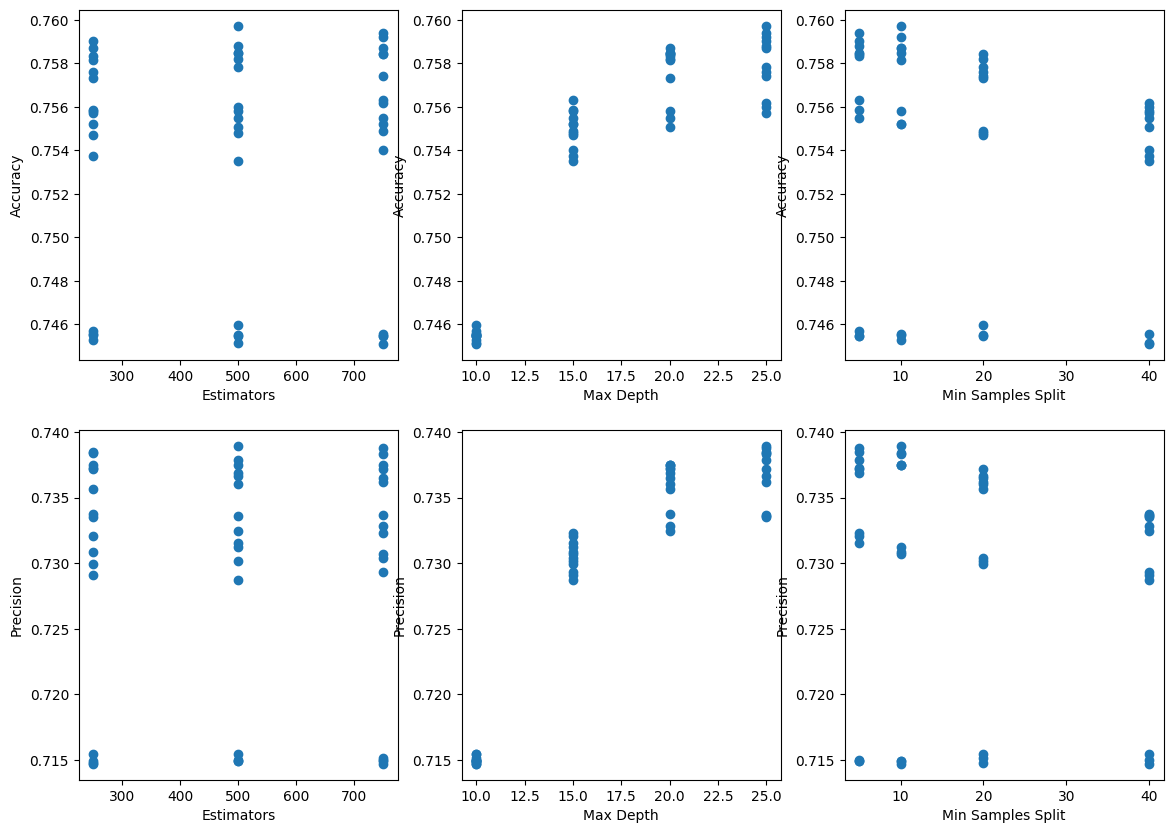

In [10]:
cv_results = pd.DataFrame(grid_result.cv_results_)

fig, axes = plt.subplots(2,3,figsize=(14,10));
plt.subplots_adjust(wspace=0.2);
axes[0,0].plot(cv_results.param_n_estimators, cv_results.mean_test_accuracy, 'o');
axes[0,0].set_xlabel('Estimators');
axes[0,0].set_ylabel('Accuracy');
axes[0,1].plot(cv_results.param_max_depth, cv_results.mean_test_accuracy, 'o');
axes[0,1].set_xlabel('Max Depth');
axes[0,1].set_ylabel('Accuracy');
axes[0,2].plot(cv_results.param_min_samples_split, cv_results.mean_test_accuracy, 'o');
axes[0,2].set_xlabel('Min Samples Split');
axes[0,2].set_ylabel('Accuracy');

axes[1,0].plot(cv_results.param_n_estimators, cv_results.mean_test_precision, 'o');
axes[1,0].set_xlabel('Estimators');
axes[1,0].set_ylabel('Precision');
axes[1,1].plot(cv_results.param_max_depth, cv_results.mean_test_precision, 'o');
axes[1,1].set_xlabel('Max Depth');
axes[1,1].set_ylabel('Precision');
axes[1,2].plot(cv_results.param_min_samples_split, cv_results.mean_test_precision, 'o');
axes[1,2].set_xlabel('Min Samples Split');
axes[1,2].set_ylabel('Precision');

In [9]:
model = RandomForestClassifier(random_state = 1, max_features = 'sqrt')

params = {'n_estimators': [250, 500, 750],
          'max_depth':[10, 15, 20, 25],
         'min_samples_split': [5, 10, 20, 40]}

grid_search = GridSearchCV(estimator = model, param_grid = params, verbose = 1,
                           n_jobs = -1, cv = 5, scoring = ['accuracy', 'precision'],
                          refit = 'precision')
grid_result = grid_search.fit(X_train_scaled, y_train)

print("Best params:", grid_result.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best params: {'max_depth': 25, 'min_samples_split': 10, 'n_estimators': 500}


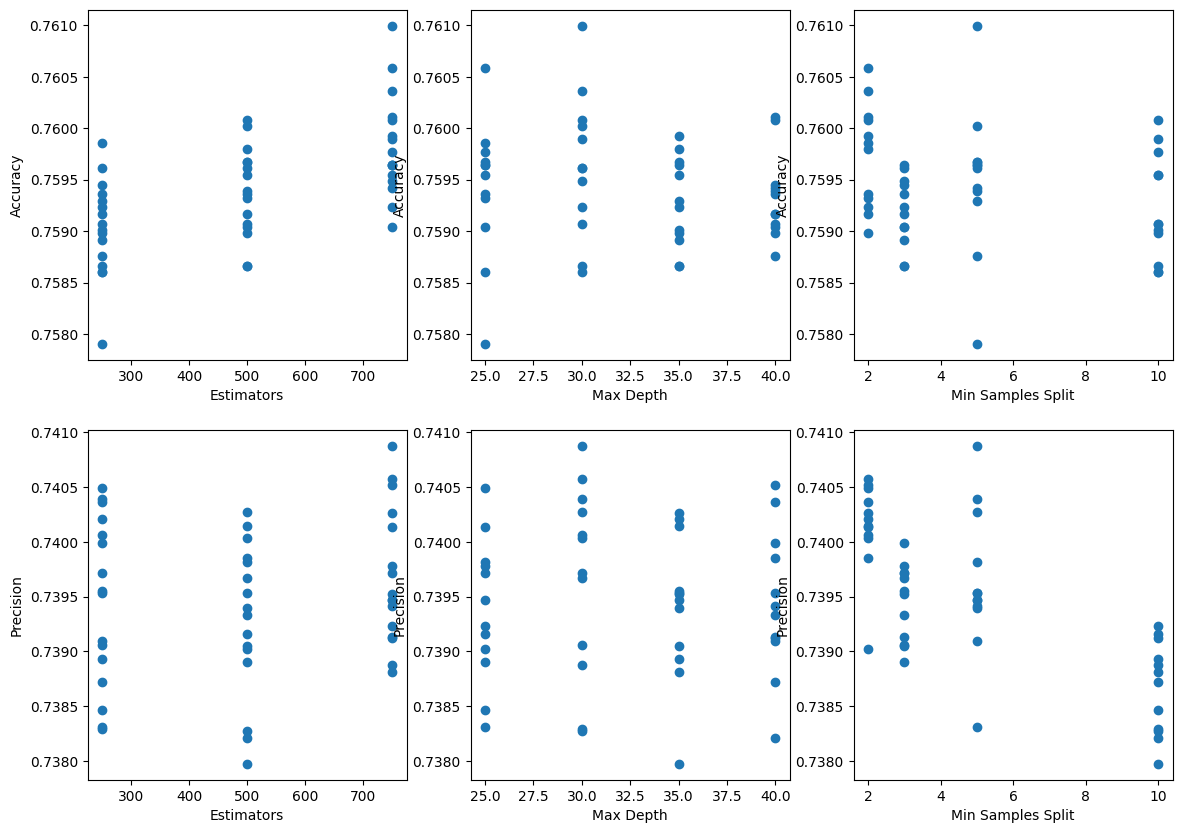

In [12]:
cv_results = pd.DataFrame(grid_result.cv_results_)

fig, axes = plt.subplots(2,3,figsize=(14,10));
plt.subplots_adjust(wspace=0.2);
axes[0,0].plot(cv_results.param_n_estimators, cv_results.mean_test_accuracy, 'o');
axes[0,0].set_xlabel('Estimators');
axes[0,0].set_ylabel('Accuracy');
axes[0,1].plot(cv_results.param_max_depth, cv_results.mean_test_accuracy, 'o');
axes[0,1].set_xlabel('Max Depth');
axes[0,1].set_ylabel('Accuracy');
axes[0,2].plot(cv_results.param_min_samples_split, cv_results.mean_test_accuracy, 'o');
axes[0,2].set_xlabel('Min Samples Split');
axes[0,2].set_ylabel('Accuracy');

axes[1,0].plot(cv_results.param_n_estimators, cv_results.mean_test_precision, 'o');
axes[1,0].set_xlabel('Estimators');
axes[1,0].set_ylabel('Precision');
axes[1,1].plot(cv_results.param_max_depth, cv_results.mean_test_precision, 'o');
axes[1,1].set_xlabel('Max Depth');
axes[1,1].set_ylabel('Precision');
axes[1,2].plot(cv_results.param_min_samples_split, cv_results.mean_test_precision, 'o');
axes[1,2].set_xlabel('Min Samples Split');
axes[1,2].set_ylabel('Precision');

In [11]:
model = RandomForestClassifier(random_state = 1, max_features = 'sqrt')

params = {'n_estimators': [250, 500, 750],
          'max_depth':[25, 30, 35, 40],
         'min_samples_split': [2, 3, 5, 10]}

grid_search = GridSearchCV(estimator = model, param_grid = params, verbose = 1,
                           n_jobs = -1, cv = 5, scoring = ['accuracy', 'precision'],
                          refit = 'precision')
grid_result = grid_search.fit(X_train, y_train)

print("Best params:", grid_result.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best params: {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 750}


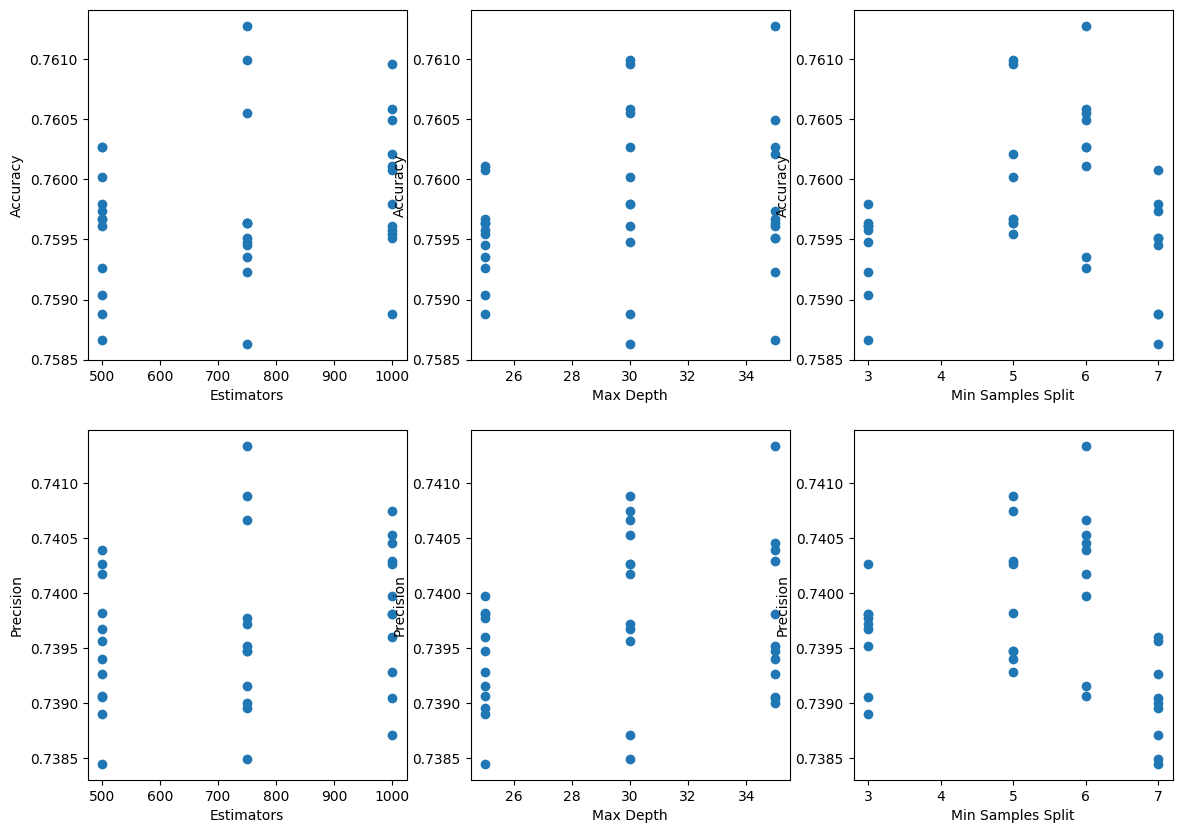

In [23]:
cv_results = pd.DataFrame(grid_result.cv_results_)

fig, axes = plt.subplots(2,3,figsize=(14,10));
plt.subplots_adjust(wspace=0.2);
axes[0,0].plot(cv_results.param_n_estimators, cv_results.mean_test_accuracy, 'o');
axes[0,0].set_xlabel('Estimators');
axes[0,0].set_ylabel('Accuracy');
axes[0,1].plot(cv_results.param_max_depth, cv_results.mean_test_accuracy, 'o');
axes[0,1].set_xlabel('Max Depth');
axes[0,1].set_ylabel('Accuracy');
axes[0,2].plot(cv_results.param_min_samples_split, cv_results.mean_test_accuracy, 'o');
axes[0,2].set_xlabel('Min Samples Split');
axes[0,2].set_ylabel('Accuracy');

axes[1,0].plot(cv_results.param_n_estimators, cv_results.mean_test_precision, 'o');
axes[1,0].set_xlabel('Estimators');
axes[1,0].set_ylabel('Precision');
axes[1,1].plot(cv_results.param_max_depth, cv_results.mean_test_precision, 'o');
axes[1,1].set_xlabel('Max Depth');
axes[1,1].set_ylabel('Precision');
axes[1,2].plot(cv_results.param_min_samples_split, cv_results.mean_test_precision, 'o');
axes[1,2].set_xlabel('Min Samples Split');
axes[1,2].set_ylabel('Precision');

In [22]:
model = RandomForestClassifier(random_state = 1, max_features = 'sqrt')

params = {'n_estimators': [500, 750, 1000],
          'max_depth':[25, 30, 35],
         'min_samples_split': [3, 5, 6, 7]}

grid_search = GridSearchCV(estimator = model, param_grid = params, verbose = 1,
                           n_jobs = -1, cv = 5, scoring = ['accuracy', 'precision'],
                          refit = 'precision')
grid_result = grid_search.fit(X_train, y_train)

print("Best params:", grid_result.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best params: {'max_depth': 35, 'min_samples_split': 6, 'n_estimators': 750}


In [24]:
threshold_vals = np.arange(0,1,0.01)
accuracy_iter = []
precision_iter = []

rf_model = RandomForestClassifier(max_features = 'sqrt', max_depth = 35, min_samples_split = 6,
                                 n_estimators = 750, random_state = 1)

predicted_probability = cross_val_predict(rf_model, 
                                    X_train, y_train, cv = 5, method = 'predict_proba')

for threshold_prob in threshold_vals:
        predicted_class = predicted_probability[:,1] > threshold_prob
        predicted_class = predicted_class.astype(int)
        
        accuracy = accuracy_score(y_train, predicted_class)
        precision = precision_score(y_train, predicted_class)
        accuracy_iter.append(accuracy)
        precision_iter.append(precision)

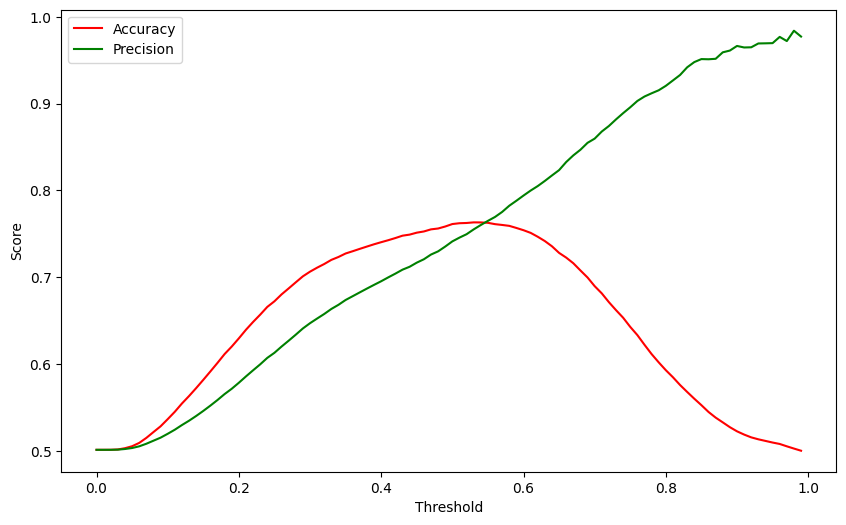

In [25]:
plt.figure(figsize=(10, 6));
plt.plot(threshold_vals, accuracy_iter, "r-", label = 'Accuracy');
plt.plot(threshold_vals, precision_iter, "g-", label = 'Precision');
plt.ylabel('Score');
plt.xlabel('Threshold');
plt.legend();

In [27]:
scores_RF = pd.DataFrame(columns = ['Threshold', 'Accuracy', 'Precision'])
scores_RF['Threshold'] = threshold_vals
scores_RF['Accuracy'] = accuracy_iter
scores_RF['Precision'] = precision_iter

scores_RF[(scores_RF.Accuracy >= 0.75) & (scores_RF.Precision >= 0.7)]

,Threshold,Accuracy,Precision
45,0.45,0.751348,0.716799
46,0.46,0.752735,0.720715
47,0.47,0.755163,0.726135
48,0.48,0.756141,0.729823
49,0.49,0.758442,0.735338
50,0.50,0.761280,0.741303
51,0.51,0.762226,0.745648
52,0.52,0.762510,0.749567
53,0.53,0.763204,0.755127
54,0.54,0.763140,0.760164


In [57]:
desired_threshold = 0.61

rf_model.fit(X_train_scaled, y_train)
y_pred_prob = rf_model.predict_proba(X_train_scaled)[:,1] 

y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

# Accuracy and precision

print("Train Accuracy: ", accuracy_score(y_train, y_pred))  
print("Train Precision: ", precision_score(y_train, y_pred))

Train Accuracy:  0.9772032161437806
Train Precision:  0.999868212967844


In [58]:
y_pred_prob = rf_model.predict_proba(X_test_scaled)[:,1] 

y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

# Accuracy and precision

print("Test Accuracy: ", accuracy_score(y_test, y_pred))  
print("Test Precision: ", precision_score(y_test, y_pred))

Test Accuracy:  0.7565897338882583
Test Precision:  0.804513571210735


In [ ]:
feature_importances = pd.DataFrame(columns = ['Predictor', 'Importance'])
feature_importances['Predictor'] = rf_model.feature_names_in_
feature_importances['Importance'] = rf_model.feature_importances_
feature_importances.sort_values(by = 'Importance', ascending = False)

,Predictor,Importance
22,kw_avg_avg,0.119537
21,kw_max_avg,0.109284
24,self_reference_max_shares,0.064592
23,self_reference_min_shares,0.057695
2,n_tokens_content,0.055721
16,kw_avg_min,0.046669
3,n_non_stop_unique_tokens,0.044671
4,num_hrefs,0.034235
19,kw_avg_max,0.033336
35,global_subjectivity,0.032439


## AdaBoost

In [31]:
base_model = AdaBoostClassifier(estimator = DecisionTreeClassifier(random_state = 1),
                           random_state = 1)
base_model.fit(X_train_scaled, y_train)

y_pred = base_model.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))

Accuracy: 0.6608651784588221
Precision: 0.6562342251388188


In [ ]:
cv_results = pd.DataFrame(grid_result.cv_results_)

fig, axes = plt.subplots(1,3,figsize=(14,5));
plt.subplots_adjust(wspace=0.2);
axes[0].plot(cv_results.param_n_estimators, cv_results.mean_accuracy, 'o');
axes[0].set_xlabel('Estimators');
axes[0].set_ylabel('Accuracy');
axes[1].plot(cv_results.param_learning_rate, cv_results.mean_accuracy, 'o');
axes[1].set_xlabel('Learning Rate');
axes[1].set_ylabel('Accuracy');
axes[2].bar(cv_results.param_estimator.astype(str), cv_results.mean_accuracy)
axes[2].set_xlabel('Decision Tree Depth');
axes[2].set_ylabel('Accuracy');

In [ ]:
cv_results = pd.DataFrame(grid_result.cv_results_)

fig, axes = plt.subplots(1,3,figsize=(14,5));
plt.subplots_adjust(wspace=0.2);
axes[0].plot(cv_results.param_n_estimators, cv_results.mean_precision, 'o');
axes[0].set_xlabel('Estimators');
axes[0].set_ylabel('Precision');
axes[1].plot(cv_results.param_learning_rate, cv_results.mean_precision, 'o');
axes[1].set_xlabel('Learning Rate');
axes[1].set_ylabel('Precision');
axes[2].bar(cv_results.param_estimator.astype(str), cv_results.mean_precision)
axes[2].set_xlabel('Decision Tree Depth');
axes[2].set_ylabel('Precision');

In [ ]:
model = AdaBoostClassifier(random_state = 1)

params = {'n_estimators': [200, 400, 600, 800],
          'learning_rate':[0.0025, 0.005, 0.0075, 0.01],
          'estimator': [DecisionTreeClassifier(max_depth = 5), DecisionTreeClassifier(max_depth = 10), 
                          DecisionTreeClassifier(max_depth = 15), DecisionTreeClassifier(max_depth = 20)]}


# define the grid search procedure
grid_search = GridSearchCV(estimator = model, verbose = 1, param_grid = params, 
                           n_jobs = 8, cv = 5, scoring = ['accuracy', 'precision'],
                          refit = 'precision')
grid_result = grid_search.fit(X_train_scaled, y_train)

print("Best params:", grid_result.best_params_)

In [ ]:
threshold_vals = np.arange(0,1.01,0.01)
accuracy_iter = []
precision_iter = []

adaboost_model = AdaBoostRegressor(estimator = DecisionTreeRegressor(max_depth = 10), 
                                   learning_rate = 0.01, n_estimators = 200,
                                   random_state = 1)

predicted_probability = cross_val_predict(adaboost_model, 
                                    X_train, y_train, cv = 5, method = 'predict_proba')

for threshold_prob in threshold_vals:
        predicted_class = predicted_probability[:,1] > threshold_prob
        predicted_class = predicted_class.astype(int)
        
        accuracy = accuracy_score(y_train, predicted_class)
        precision = precision_score(y_train, predicted_class)
        accuracy_iter.append(accuracy)
        precision_iter.append(precision)

In [ ]:
feature_importances = pd.DataFrame(columns = ['Predictor', 'Importance'])
feature_importances['Predictor'] = adaboost_model.feature_names_in_
feature_importances['Importance'] = adaboost_model.feature_importances_
feature_importances.sort_values(by = 'Importance', ascending = False)

# Gradient boosting

In [41]:
base_model = GradientBoostingClassifier(random_state = 1) 
base_model.fit(X_train_scaled, y_train)

y_pred = base_model.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))

Accuracy: 0.7617606255517719
Precision: 0.7443645083932854


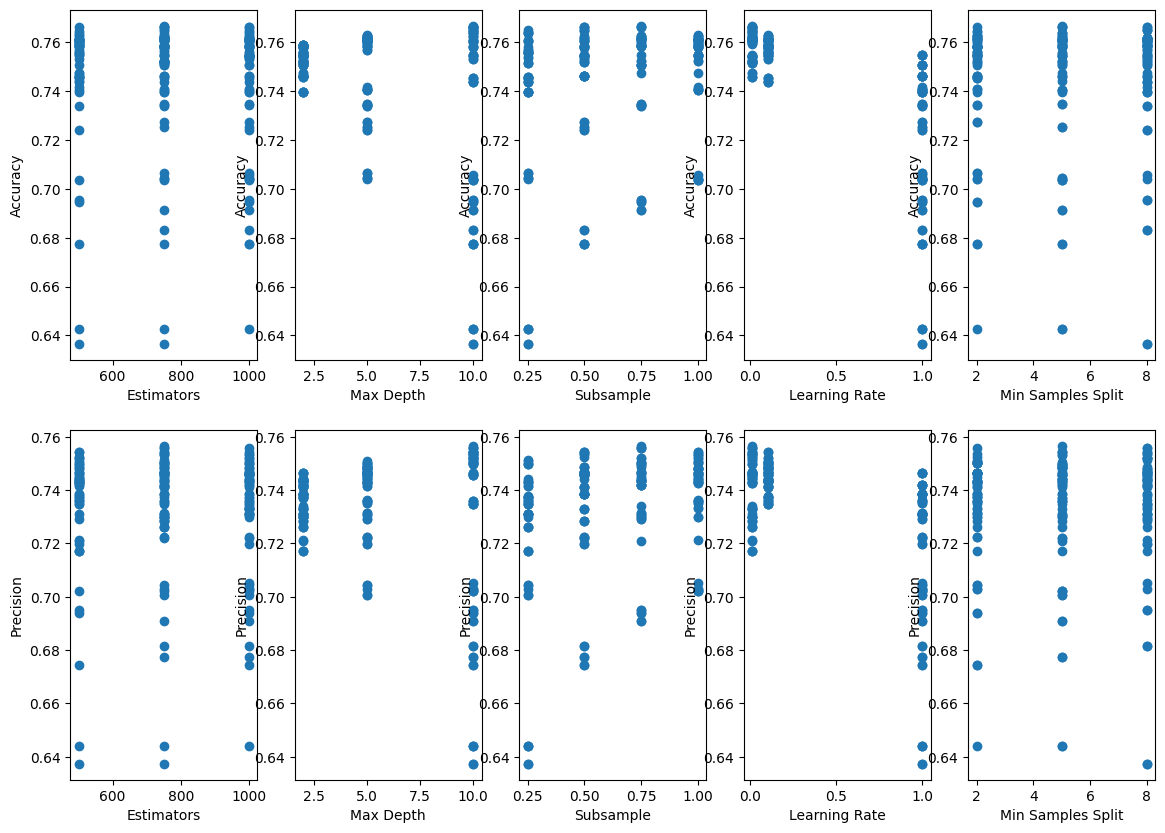

In [47]:
cv_results = pd.DataFrame(grid_result.cv_results_)

fig, axes = plt.subplots(2,5,figsize=(14,10));
plt.subplots_adjust(wspace=0.2);
axes[0,0].plot(cv_results.param_n_estimators, cv_results.mean_test_accuracy, 'o');
axes[0,0].set_xlabel('Estimators');
axes[0,0].set_ylabel('Accuracy');
axes[0,1].plot(cv_results.param_max_depth, cv_results.mean_test_accuracy, 'o');
axes[0,1].set_xlabel('Max Depth');
axes[0,1].set_ylabel('Accuracy');
axes[0,2].plot(cv_results.param_subsample, cv_results.mean_test_accuracy, 'o');
axes[0,2].set_xlabel('Subsample');
axes[0,2].set_ylabel('Accuracy');
axes[0,3].plot(cv_results.param_learning_rate, cv_results.mean_test_accuracy, 'o');
axes[0,3].set_xlabel('Learning Rate');
axes[0,3].set_ylabel('Accuracy');
axes[0,4].plot(cv_results.param_min_samples_split, cv_results.mean_test_accuracy, 'o');
axes[0,4].set_xlabel('Min Samples Split');
axes[0,4].set_ylabel('Accuracy');

axes[1,0].plot(cv_results.param_n_estimators, cv_results.mean_test_precision, 'o');
axes[1,0].set_xlabel('Estimators');
axes[1,0].set_ylabel('Precision');
axes[1,1].plot(cv_results.param_max_depth, cv_results.mean_test_precision, 'o');
axes[1,1].set_xlabel('Max Depth');
axes[1,1].set_ylabel('Precision');
axes[1,2].plot(cv_results.param_subsample, cv_results.mean_test_precision, 'o');
axes[1,2].set_xlabel('Subsample');
axes[1,2].set_ylabel('Precision');
axes[1,3].plot(cv_results.param_learning_rate, cv_results.mean_test_precision, 'o');
axes[1,3].set_xlabel('Learning Rate');
axes[1,3].set_ylabel('Precision');
axes[1,4].plot(cv_results.param_min_samples_split, cv_results.mean_test_precision, 'o');
axes[1,4].set_xlabel('Min Samples Split');
axes[1,4].set_ylabel('Precision');

In [46]:
model = GradientBoostingClassifier(n_iter_no_change = 10, random_state = 1)

params = {'n_estimators': [500, 750, 1000],
          'learning_rate':[0.01, 0.1, 1.0],
          'max_depth':[2, 5, 10],
         'min_samples_split': [2, 5, 8],
         'subsample':[0.25, 0.5, 0.75, 1.0]}

cv = StratifiedKFold(n_splits = 5,shuffle=True,random_state = 1)

grid_search = RandomizedSearchCV(estimator = model, param_distributions = params, verbose = 1,
                           n_iter = 200, n_jobs = -1, cv = cv, scoring = ['accuracy', 'precision'],
                          refit = 'precision', random_state = 1)
grid_result = grid_search.fit(X_train_scaled, y_train)

print("Best params:", grid_result.best_params_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best params: {'subsample': 0.75, 'n_estimators': 750, 'min_samples_split': 5, 'max_depth': 10, 'learning_rate': 0.01}


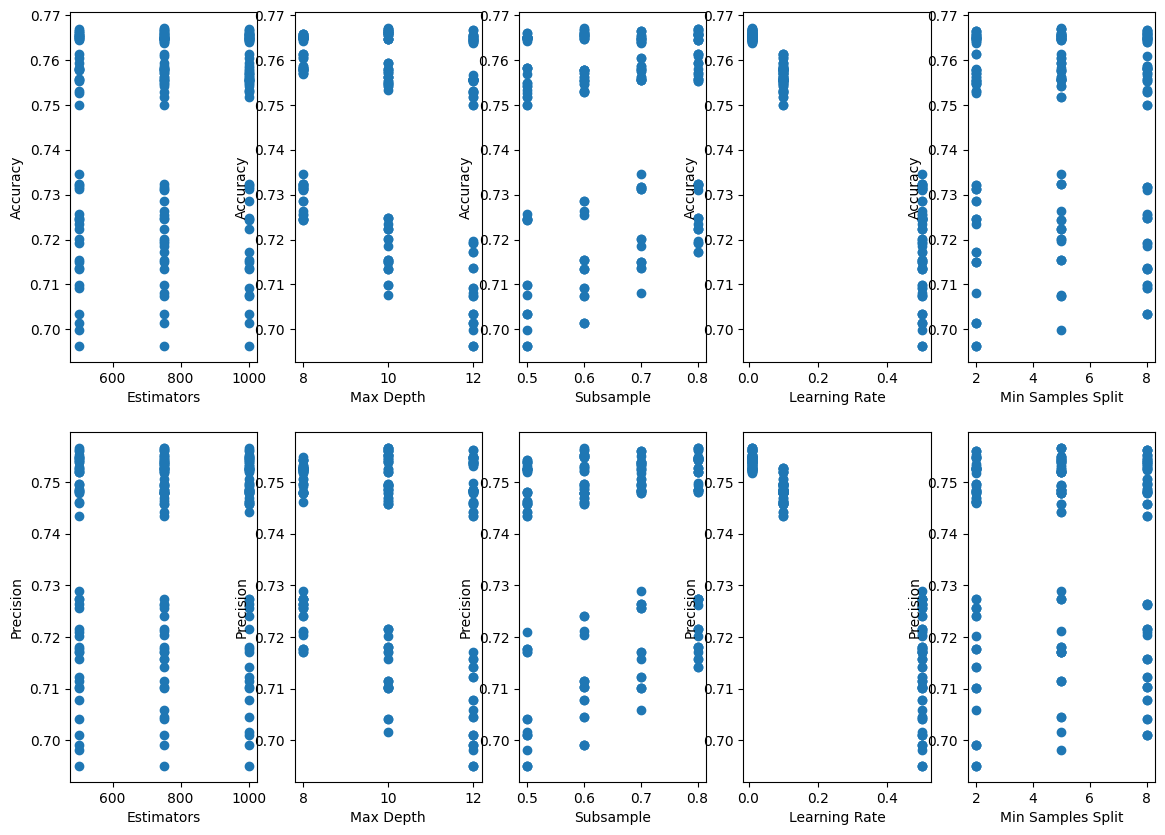

In [65]:
cv_results = pd.DataFrame(grid_result.cv_results_)

fig, axes = plt.subplots(2,5,figsize=(14,10));
plt.subplots_adjust(wspace=0.2);
axes[0,0].plot(cv_results.param_n_estimators, cv_results.mean_test_accuracy, 'o');
axes[0,0].set_xlabel('Estimators');
axes[0,0].set_ylabel('Accuracy');
axes[0,1].plot(cv_results.param_max_depth, cv_results.mean_test_accuracy, 'o');
axes[0,1].set_xlabel('Max Depth');
axes[0,1].set_ylabel('Accuracy');
axes[0,2].plot(cv_results.param_subsample, cv_results.mean_test_accuracy, 'o');
axes[0,2].set_xlabel('Subsample');
axes[0,2].set_ylabel('Accuracy');
axes[0,3].plot(cv_results.param_learning_rate, cv_results.mean_test_accuracy, 'o');
axes[0,3].set_xlabel('Learning Rate');
axes[0,3].set_ylabel('Accuracy');
axes[0,4].plot(cv_results.param_min_samples_split, cv_results.mean_test_accuracy, 'o');
axes[0,4].set_xlabel('Min Samples Split');
axes[0,4].set_ylabel('Accuracy');

axes[1,0].plot(cv_results.param_n_estimators, cv_results.mean_test_precision, 'o');
axes[1,0].set_xlabel('Estimators');
axes[1,0].set_ylabel('Precision');
axes[1,1].plot(cv_results.param_max_depth, cv_results.mean_test_precision, 'o');
axes[1,1].set_xlabel('Max Depth');
axes[1,1].set_ylabel('Precision');
axes[1,2].plot(cv_results.param_subsample, cv_results.mean_test_precision, 'o');
axes[1,2].set_xlabel('Subsample');
axes[1,2].set_ylabel('Precision');
axes[1,3].plot(cv_results.param_learning_rate, cv_results.mean_test_precision, 'o');
axes[1,3].set_xlabel('Learning Rate');
axes[1,3].set_ylabel('Precision');
axes[1,4].plot(cv_results.param_min_samples_split, cv_results.mean_test_precision, 'o');
axes[1,4].set_xlabel('Min Samples Split');
axes[1,4].set_ylabel('Precision');

In [64]:
model = GradientBoostingClassifier(n_iter_no_change = 10, random_state = 1)

params = {'n_estimators': [500, 750, 1000],
          'learning_rate':[0.01, 0.05, 0.1],
          'max_depth':[8, 10, 12],
         'min_samples_split': [2, 5, 8],
         'subsample':[0.5, 0.6, 0.7, 0.8]}

cv = StratifiedKFold(n_splits = 5,shuffle=True,random_state = 1)

grid_search = RandomizedSearchCV(estimator = model, param_distributions = params, verbose = 1,
                           n_iter = 200, n_jobs = -1, cv = cv, scoring = ['accuracy', 'precision'],
                          refit = 'precision', random_state = 1)
grid_result = grid_search.fit(X_train_scaled, y_train)

print("Best params:", grid_result.best_params_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best params: {'subsample': 0.6, 'n_estimators': 750, 'min_samples_split': 5, 'max_depth': 10, 'learning_rate': 0.01}


In [49]:
threshold_vals = np.arange(0,1.01,0.01)
accuracy_iter = []
precision_iter = []

gradient_model = GradientBoostingClassifier(subsample = 0.75, n_estimators = 750, min_samples_split = 5,
                                            max_depth = 10, learning_rate = 0.01,
                                   n_iter_no_change = 10, random_state = 1)

predicted_probability = cross_val_predict(gradient_model, 
                                    X_train, y_train, cv = 5, method = 'predict_proba')

for threshold_prob in threshold_vals:
        predicted_class = predicted_probability[:,1] > threshold_prob
        predicted_class = predicted_class.astype(int)
        
        accuracy = accuracy_score(y_train, predicted_class)
        precision = precision_score(y_train, predicted_class)
        accuracy_iter.append(accuracy)
        precision_iter.append(precision)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


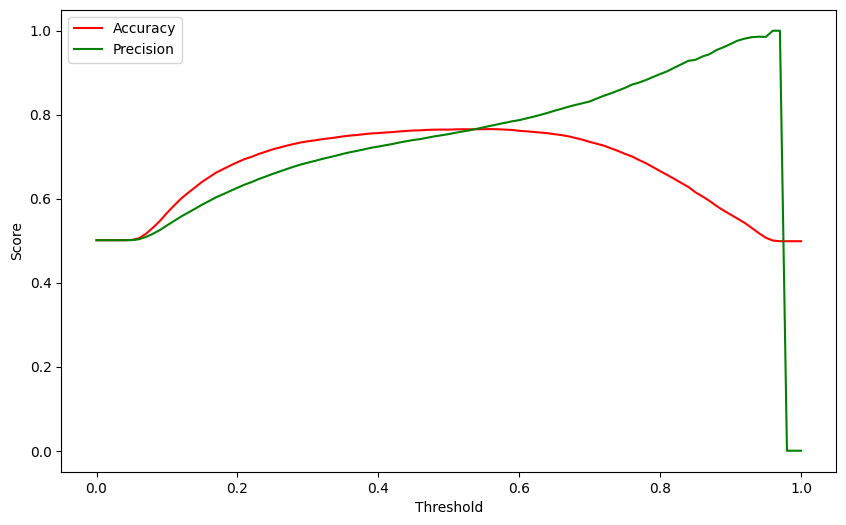

In [50]:
plt.figure(figsize=(10, 6));
plt.plot(threshold_vals, accuracy_iter, "r-", label = 'Accuracy');
plt.plot(threshold_vals, precision_iter, "g-", label = 'Precision');
plt.ylabel('Score');
plt.xlabel('Threshold');
plt.legend();

In [60]:
scores_grad = pd.DataFrame(columns = ['Threshold', 'Accuracy', 'Precision'])
scores_grad['Threshold'] = threshold_vals
scores_grad['Accuracy'] = accuracy_iter
scores_grad['Precision'] = precision_iter

scores_grad[(scores_grad.Accuracy >= 0.75) & (scores_grad.Precision >= 0.75)]

,Threshold,Accuracy,Precision
49,0.49,0.764591,0.751177
50,0.50,0.764559,0.753886
51,0.51,0.765158,0.757232
52,0.52,0.765411,0.760234
53,0.53,0.765285,0.762960
54,0.54,0.765442,0.766482
55,0.55,0.765568,0.770184
56,0.56,0.765789,0.773783
57,0.57,0.765348,0.777420
58,0.58,0.764528,0.780844


In [61]:
desired_threshold = 0.6

gradient_model.fit(X_train_scaled, y_train)
y_pred_prob = gradient_model.predict_proba(X_train_scaled)[:,1] 

y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

# Accuracy and precision

print("Train Accuracy: ", accuracy_score(y_train, y_pred))  
print("Train Precision: ", precision_score(y_train, y_pred))

Train Accuracy:  0.8951915497398707
Train Precision:  0.9338717470835922


In [63]:
y_pred_prob = gradient_model.predict_proba(X_test_scaled)[:,1] 

y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

# Accuracy and precision

print("Test Accuracy: ", accuracy_score(y_test, y_pred))  
print("Test Precision: ", precision_score(y_test, y_pred))

Test Accuracy:  0.7684449489216799
Test Precision:  0.7937622927788704


# XGBoost

In [70]:
base_model = xgb.XGBClassifier(random_state = 1, objective = 'binary:logistic',
                                                         scale_pos_weight = 1)
base_model.fit(X_train_scaled, y_train)

y_pred = base_model.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))

Accuracy: 0.7655442048177576
Precision: 0.7560673600792471


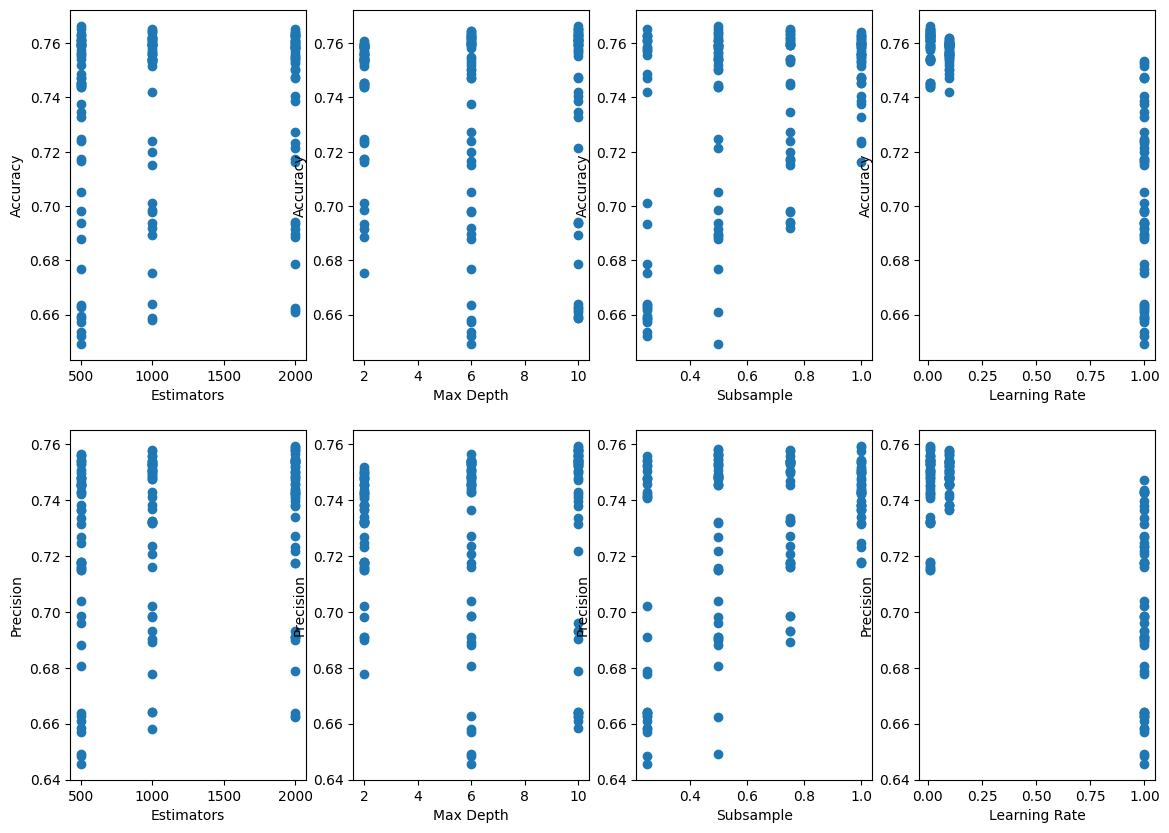

In [69]:
cv_results = pd.DataFrame(grid_result.cv_results_)

fig, axes = plt.subplots(2,4,figsize=(14,10));
plt.subplots_adjust(wspace=0.2);
axes[0,0].plot(cv_results.param_n_estimators, cv_results.mean_test_accuracy, 'o');
axes[0,0].set_xlabel('Estimators');
axes[0,0].set_ylabel('Accuracy');
axes[0,1].plot(cv_results.param_max_depth, cv_results.mean_test_accuracy, 'o');
axes[0,1].set_xlabel('Max Depth');
axes[0,1].set_ylabel('Accuracy');
axes[0,2].plot(cv_results.param_subsample, cv_results.mean_test_accuracy, 'o');
axes[0,2].set_xlabel('Subsample');
axes[0,2].set_ylabel('Accuracy');
axes[0,3].plot(cv_results.param_learning_rate, cv_results.mean_test_accuracy, 'o');
axes[0,3].set_xlabel('Learning Rate');
axes[0,3].set_ylabel('Accuracy');

axes[1,0].plot(cv_results.param_n_estimators, cv_results.mean_test_precision, 'o');
axes[1,0].set_xlabel('Estimators');
axes[1,0].set_ylabel('Precision');
axes[1,1].plot(cv_results.param_max_depth, cv_results.mean_test_precision, 'o');
axes[1,1].set_xlabel('Max Depth');
axes[1,1].set_ylabel('Precision');
axes[1,2].plot(cv_results.param_subsample, cv_results.mean_test_precision, 'o');
axes[1,2].set_xlabel('Subsample');
axes[1,2].set_ylabel('Precision');
axes[1,3].plot(cv_results.param_learning_rate, cv_results.mean_test_precision, 'o');
axes[1,3].set_xlabel('Learning Rate');
axes[1,3].set_ylabel('Precision');

In [68]:
param_grid = {'n_estimators':[500, 1000, 2000],
         'learning_rate': [0.01, 0.1, 1.0],
         'max_depth': [2, 6, 10],
         'subsample': [0.25, 0.5, 0.75, 1.0],
         'gamma': [0, 10],
         'reg_lambda':[0, 1, 10]}

cv = StratifiedKFold(n_splits = 3, shuffle=True, random_state = 1)


grid_search = RandomizedSearchCV(estimator = xgb.XGBClassifier(random_state = 1, objective = 'binary:logistic',
                                                         scale_pos_weight = 1),                                                       
                             param_distributions = param_grid, scoring = ['accuracy', 'precision'], 
                                 refit = 'precision', n_iter = 150,
                                 verbose = 1, n_jobs = 8, cv = cv)

grid_result = grid_search.fit(X_train_scaled,y_train)

print("Optimal parameters: ", grid_search.best_params_)

Fitting 3 folds for each of 150 candidates, totalling 450 fits
Optimal parameters:  {'subsample': 1.0, 'reg_lambda': 10, 'n_estimators': 2000, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0}


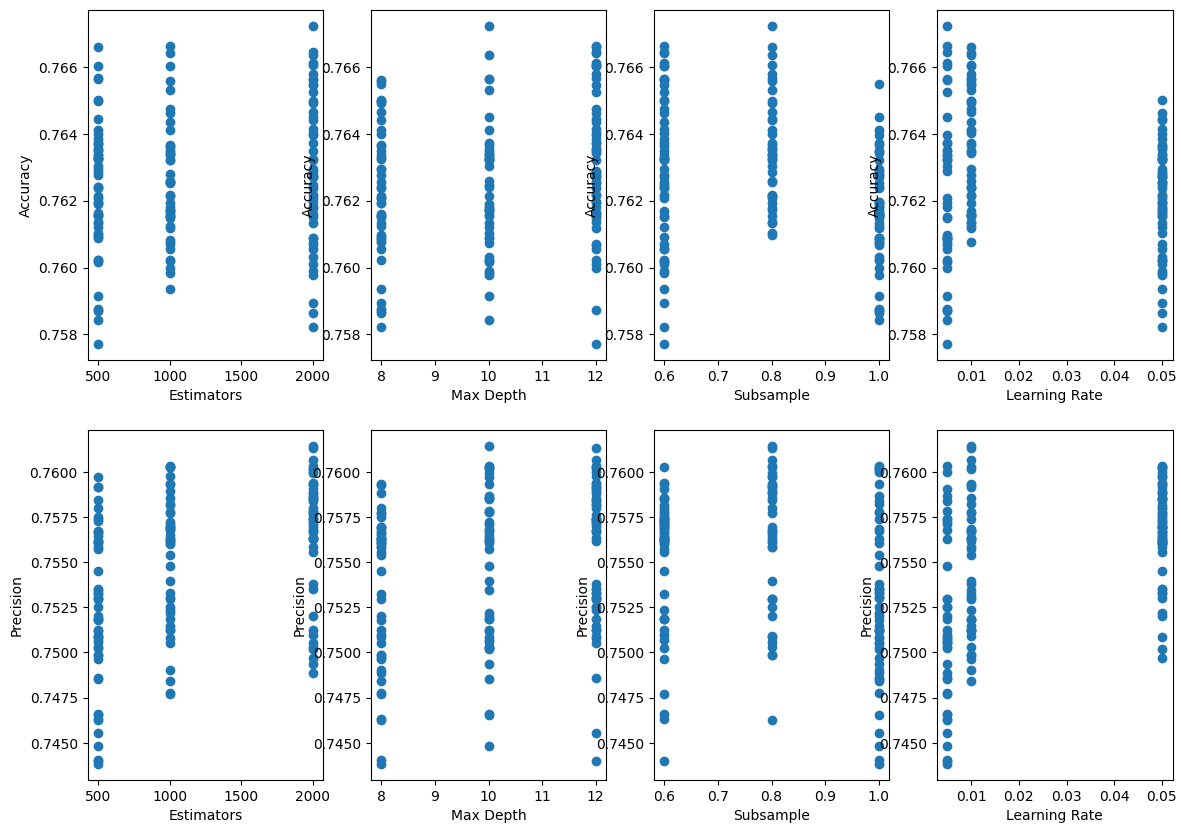

In [72]:
cv_results = pd.DataFrame(grid_result.cv_results_)

fig, axes = plt.subplots(2,4,figsize=(14,10));
plt.subplots_adjust(wspace=0.2);
axes[0,0].plot(cv_results.param_n_estimators, cv_results.mean_test_accuracy, 'o');
axes[0,0].set_xlabel('Estimators');
axes[0,0].set_ylabel('Accuracy');
axes[0,1].plot(cv_results.param_max_depth, cv_results.mean_test_accuracy, 'o');
axes[0,1].set_xlabel('Max Depth');
axes[0,1].set_ylabel('Accuracy');
axes[0,2].plot(cv_results.param_subsample, cv_results.mean_test_accuracy, 'o');
axes[0,2].set_xlabel('Subsample');
axes[0,2].set_ylabel('Accuracy');
axes[0,3].plot(cv_results.param_learning_rate, cv_results.mean_test_accuracy, 'o');
axes[0,3].set_xlabel('Learning Rate');
axes[0,3].set_ylabel('Accuracy');

axes[1,0].plot(cv_results.param_n_estimators, cv_results.mean_test_precision, 'o');
axes[1,0].set_xlabel('Estimators');
axes[1,0].set_ylabel('Precision');
axes[1,1].plot(cv_results.param_max_depth, cv_results.mean_test_precision, 'o');
axes[1,1].set_xlabel('Max Depth');
axes[1,1].set_ylabel('Precision');
axes[1,2].plot(cv_results.param_subsample, cv_results.mean_test_precision, 'o');
axes[1,2].set_xlabel('Subsample');
axes[1,2].set_ylabel('Precision');
axes[1,3].plot(cv_results.param_learning_rate, cv_results.mean_test_precision, 'o');
axes[1,3].set_xlabel('Learning Rate');
axes[1,3].set_ylabel('Precision');

In [71]:
param_grid = {'n_estimators':[500, 1000, 2000],
         'learning_rate': [0.005, 0.01, 0.05],
         'max_depth': [8, 10, 12],
         'subsample': [0.6, 0.8, 1.0],
         'gamma': [0, 10],
         'reg_lambda':[0, 1, 10]}

cv = StratifiedKFold(n_splits = 3, shuffle=True, random_state = 1)


grid_search = RandomizedSearchCV(estimator = xgb.XGBClassifier(random_state = 1, objective = 'binary:logistic',
                                                         scale_pos_weight = 1),                                                       
                             param_distributions = param_grid, scoring = ['accuracy', 'precision'], 
                                 refit = 'precision', n_iter = 150,
                                 verbose = 1, n_jobs = 8, cv = cv)

grid_result = grid_search.fit(X_train_scaled,y_train)

print("Optimal parameters: ", grid_search.best_params_)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Optimal parameters:  {'subsample': 0.8, 'reg_lambda': 10, 'n_estimators': 2000, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0}


In [73]:
threshold_vals = np.arange(0,1.01,0.01)
accuracy_iter = []
precision_iter = []

xgb_model = xgb.XGBClassifier(random_state = 1, objective = 'binary:logistic', scale_pos_weight = 1,
                             subsample = 0.8, reg_lambda = 10, n_estimators = 2000, 
                              max_depth = 10, learning_rate = 0.01, gamma = 0)

predicted_probability = cross_val_predict(xgb_model, 
                                    X_train, y_train, cv = 5, method = 'predict_proba')

for threshold_prob in threshold_vals:
        predicted_class = predicted_probability[:,1] > threshold_prob
        predicted_class = predicted_class.astype(int)
        
        accuracy = accuracy_score(y_train, predicted_class)
        precision = precision_score(y_train, predicted_class)
        accuracy_iter.append(accuracy)
        precision_iter.append(precision)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


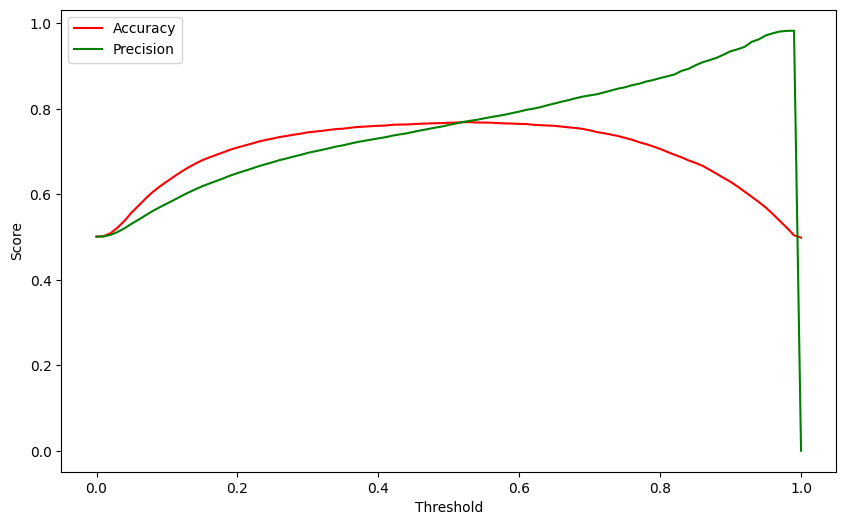

In [74]:
plt.figure(figsize=(10, 6));
plt.plot(threshold_vals, accuracy_iter, "r-", label = 'Accuracy');
plt.plot(threshold_vals, precision_iter, "g-", label = 'Precision');
plt.ylabel('Score');
plt.xlabel('Threshold');
plt.legend();

In [75]:
scores_grad = pd.DataFrame(columns = ['Threshold', 'Accuracy', 'Precision'])
scores_grad['Threshold'] = threshold_vals
scores_grad['Accuracy'] = accuracy_iter
scores_grad['Precision'] = precision_iter

scores_grad[(scores_grad.Accuracy >= 0.75) & (scores_grad.Precision >= 0.75)]

,Threshold,Accuracy,Precision
47,0.47,0.765884,0.752715
48,0.48,0.766546,0.755984
49,0.49,0.766798,0.758816
50,0.50,0.767712,0.762529
51,0.51,0.768091,0.765779
52,0.52,0.768942,0.769352
53,0.53,0.769068,0.772182
54,0.54,0.768280,0.774650
55,0.55,0.768028,0.777821
56,0.56,0.767807,0.781013


In [77]:
desired_threshold = 0.65

xgb_model.fit(X_train_scaled, y_train)
y_pred_prob = xgb_model.predict_proba(X_train_scaled)[:,1] 

y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

# Accuracy and precision

print("Train Accuracy: ", accuracy_score(y_train, y_pred))  
print("Train Precision: ", precision_score(y_train, y_pred))

Train Accuracy:  0.9680277471228126
Train Precision:  0.9982588897073595


In [78]:
y_pred_prob = xgb_model.predict_proba(X_test_scaled)[:,1] 

y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

# Accuracy and precision

print("Test Accuracy: ", accuracy_score(y_test, y_pred))  
print("Test Precision: ", precision_score(y_test, y_pred))

Test Accuracy:  0.7640307731113634
Test Precision:  0.8182662538699691
